Import packages and load datasets

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

train_df = pd.read_csv('data/train.csv', na_values="-1")
test_df = pd.read_csv('data/test.csv', na_values="-1")

In [2]:
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
test_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1.0,8,1.0,0.0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2.0,5,1.0,0.0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1.0,3,0.0,0.0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1.0,6,0.0,0.0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1.0,7,0.0,0.0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


Check how much (in percents) missing values are in each feature

In [4]:
def describe_missing_values(df):
    na_percent = {}
    N = df.shape[0]
    for column in df:
        na_percent[column] = df[column].isnull().sum() * 100 / N

    na_percent = dict(filter(lambda x: x[1] != 0, na_percent.items()))
    plt.bar(range(len(na_percent)), na_percent.values())
    plt.ylabel('Percent')
    plt.xticks(range(len(na_percent)), na_percent.keys(), rotation='vertical')
    plt.show()

Missing values for Train dataset


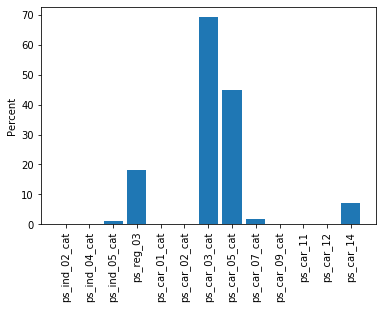

Missing values for Test dataset


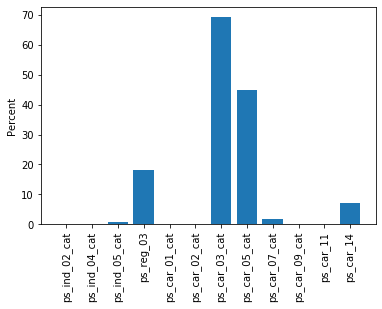

In [5]:
print("Missing values for Train dataset")
describe_missing_values(train_df)

print("Missing values for Test dataset")
describe_missing_values(test_df)

**Optional:** There is a feature with 40+% missing values and another with 60+% missing values. We can get rid of these features.

In [6]:
target = train_df.target
test_id = test_df.id
train_df.drop(["id", "target", "ps_car_03_cat", "ps_car_05_cat"], axis=1, inplace=True)
test_df.drop(["id", "ps_car_03_cat","ps_car_05_cat"], axis=1, inplace=True)

*    "cat" - categorical: fill missing values with mode value of particular column
*    "bit" - binary: fill missing values with mode value of particular column
*    all other - (continuous or ordinal): fill with mean value of particular column

In [7]:
cat_cols = [col for col in train_df.columns if 'cat' in col]
bin_cols = [col for col in train_df.columns if 'bin' in col]
con_cols = [col for col in train_df.columns if col not in bin_cols + cat_cols]

for col in cat_cols:
    train_df[col].fillna(value=train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(value=test_df[col].mode()[0], inplace=True)
    
for col in bin_cols:
    train_df[col].fillna(value=train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(value=test_df[col].mode()[0], inplace=True)
    
for col in con_cols:
    train_df[col].fillna(value=train_df[col].mean(), inplace=True)
    test_df[col].fillna(value=test_df[col].mean(), inplace=True)

Missing values for Train dataset


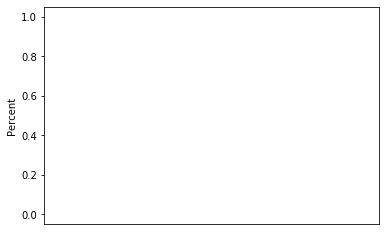

Missing values for Test dataset


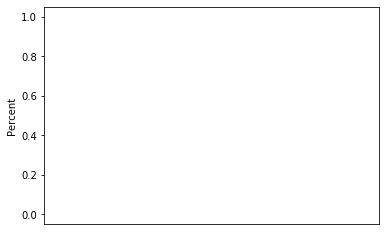

In [19]:
print("Missing values for Train dataset")
describe_missing_values(train_df)

print("Missing values for Test dataset")
describe_missing_values(test_df)

*The End ;)*